# Reduced units 

$\epsilon / k_b = 162.8 K$, $\sigma = 3.627 \AA$

Reduced units: $T^* = 0.694$, $\rho^*_l = 0.84$

## (a) Triple point formulas
$$
T = 0.69 \epsilon / k_b \quad \rho_l = 0.845 \sigma^3
$$

## (b) Reduced units converted to SI
$T = T^* \epsilon / k_b = 136.172 K$, $\rho_l = \rho^*_l \sigma^3 = 3.91251 \, 1/m^3$

In [101]:
0.84 * 162.8, 0.82 * (3.627e-10)**3

(136.752, 3.9125195364059994e-29)

# Monte Carlo acceptance rules

## The metropolis acceptance probability

Using the metropolis acceptance probability, $p_{acc} = \min(1, \exp(-\beta \Delta U))$, where $\Delta U = U_{y} - U_{x}$, the following holds.

If $U(y) < U(x)$, then $\exp(-\beta \Delta U) > 1$, and $p_{acc} = 1$. **Thus, the move is always accepted.**

## Using the symmetric acceptance probability

now, lets use the symmetric acceptance probability, $p_{acc} = \frac{1}{1 + \exp(\beta \Delta U)}$. If the system loweres its energy, $\Delta U < 0$, then if $\beta \Delta U \ll 1$, then $p_{acc} \approx 1$. So, if the change in energy is small, the move has high acceptance probability. 


# Programming a Monte Carlo simulation

The system contains one particle, and the potential is given by the equation 
$$ U(r) = x^4 + 3x^3 - 2.5x. $$

## (a) Implementing the Monte Carlo simulation

The code is given below.



In [102]:
from scipy import constants as const
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

plt.style.use('scandic')


/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_14076/2898554055.py:24: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(-(new_energy - current_energy) / k_bT)


Estimated Particle Position: -1.7462163320623487


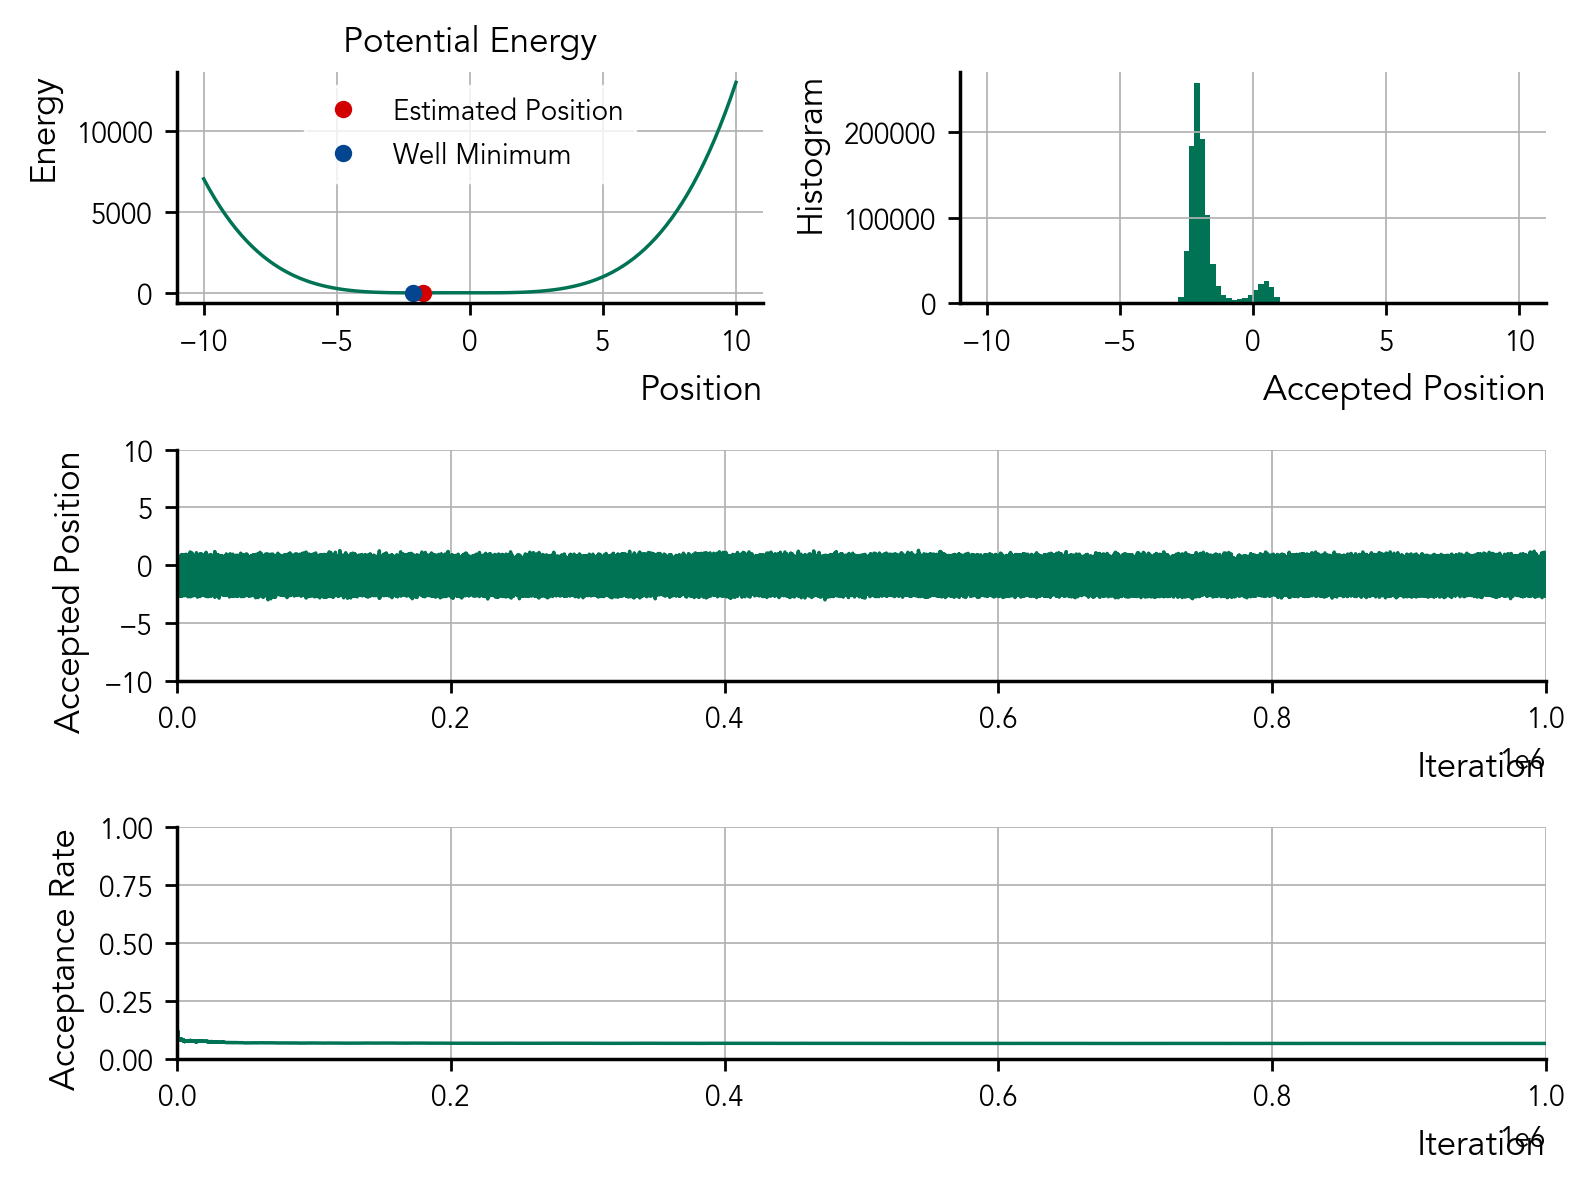

In [103]:
def potential_energy(x):
    ''' 
    Potential energy of a particle in a 1D potential well.
    '''
    return x**4 + 3*x**3 - 2.5*x

def monte_carlo_simulation(num_iterations, displacement_range, potential_energy = potential_energy, k_bT = 1):
    ''' 
    Monte Carlo simulation of a particle in a 1D potential well.
    '''
    current_position = np.random.uniform(*displacement_range)
    accepted_positions = []
    num_accepted = 0
    acc_rate = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        current_energy = potential_energy(current_position)
    
        displacement = np.random.uniform(*displacement_range)
        
        new_position = current_position + displacement
        new_energy = potential_energy(new_position)
    
        acceptance_probability = np.exp(-(new_energy - current_energy) / k_bT)
    
        if np.random.rand() <= acceptance_probability: # this is not correct
            current_position = new_position
            num_accepted += 1
    
        accepted_positions.append(current_position)
        acc_rate[i] = num_accepted / (i+1)

    estimated_position = np.mean(accepted_positions)
    return estimated_position, accepted_positions, acc_rate

num_iterations = 1000000 
displacement_range = (-10, 10) 

estimated_position, accepted_positions, acc_rate = monte_carlo_simulation(num_iterations, displacement_range)
print("Estimated Particle Position:", estimated_position)


# plotting
G = gridspec.GridSpec(3, 2)

ax = [plt.subplot(G[0, 0]), plt.subplot(G[1, :]), plt.subplot(G[0, 1]), plt.subplot(G[2, :])]

ax[0].set_title("Potential Energy")
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Position")
x = np.linspace(*displacement_range, 100)
ax[0].plot(x, potential_energy(x))
ax[0].plot(estimated_position, potential_energy(estimated_position), 'o', label="Estimated Position")
ax[0].plot(x[np.argmin(potential_energy(x))], np.min(potential_energy(x)), 'o', label="Well Minimum")
ax[0].legend()

ax[1].plot(accepted_positions)
ax[1].set_ylabel("Accepted Position")
ax[1].set_xlabel("Iteration")
ax[1].set_ylim(displacement_range)
ax[1].set_xlim(0, num_iterations)

# Plot a histogram of the accepted positions within the given range
ax[2].hist(accepted_positions, bins=100, range=displacement_range)
ax[2].set_xlabel("Accepted Position")
ax[2].set_ylabel("Histogram")

ax[3].plot(acc_rate)
ax[3].set_xlabel("Iteration")
ax[3].set_ylabel("Acceptance Rate")
ax[3].set_ylim(0, 1)
ax[3].set_xlim(0, num_iterations)

# tight layout
plt.tight_layout()

Based on the simulation the position of the particle is estimated to be at $x = -1.7$ (mean of the accepted positions).

## (b) Error estimate for $\langle x \rangle$

Using the block averaging method.


Text(0, 1, 's')

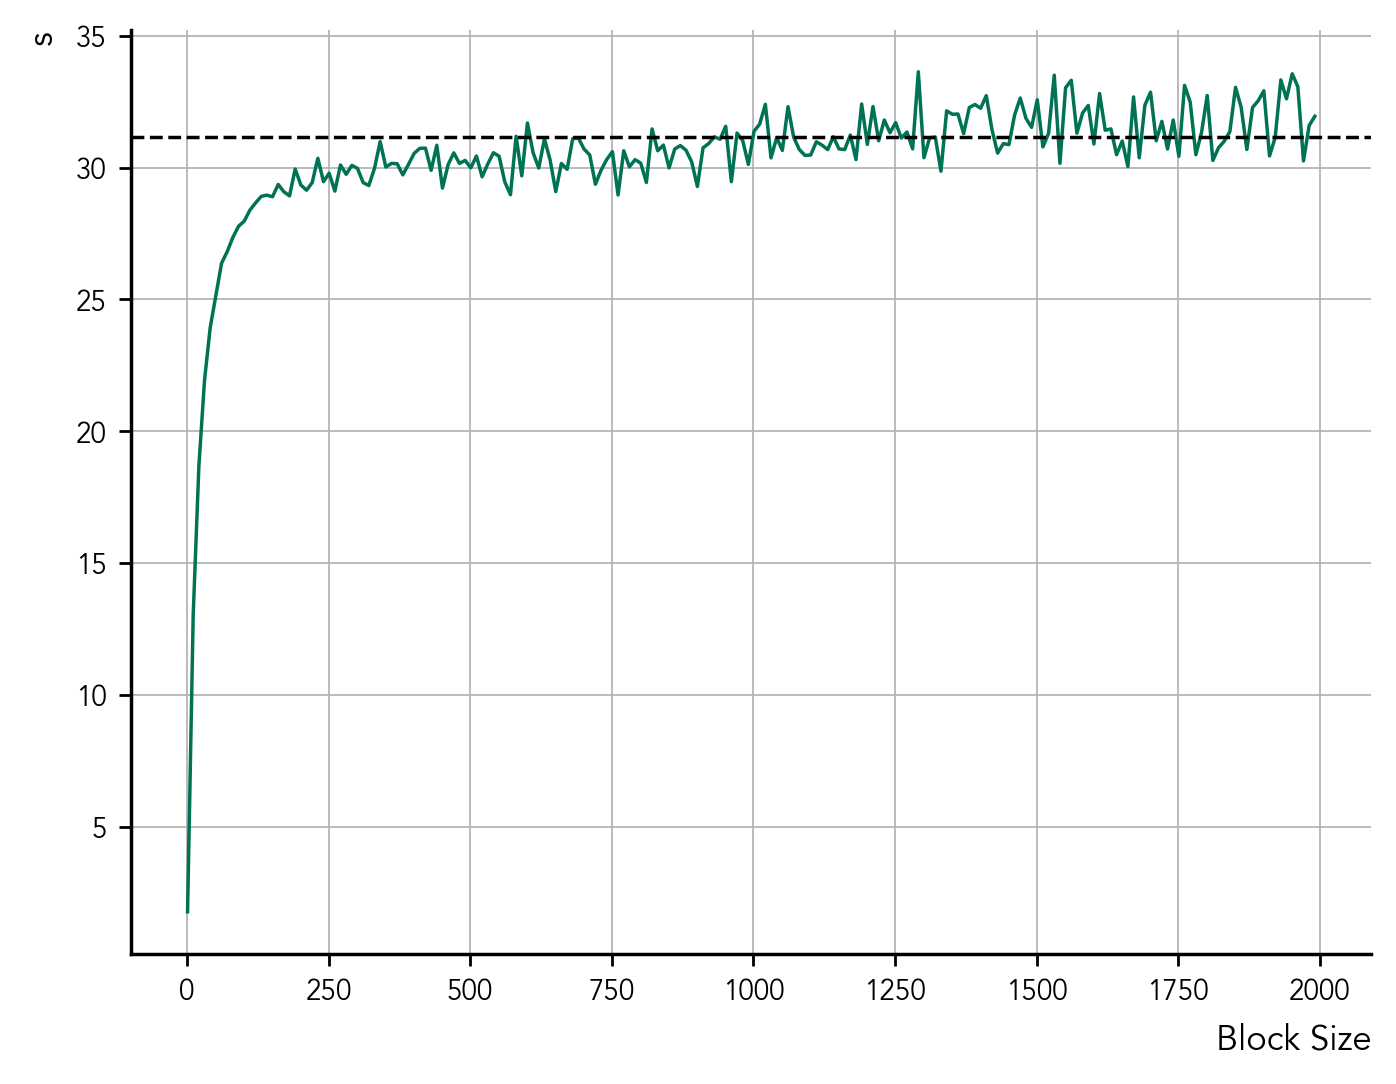

In [104]:
def block_average(sample, block_sizes):
    """Returns variances of block means for different block sizes."""
    
    variances = []
    
    for size in block_sizes:
        
        n_blocks = int(np.floor(len(sample) / size))
        
        block_averages = []
    
        for i in range(n_blocks):
            block = sample[i * size : (i+1) * size]
            block_averages.append(np.average(block))
    
        variances.append(np.var(block_averages))
        
    return variances

acc_pos_var_correlated = np.var(accepted_positions)

block_sizes = np.arange(1,2000,10)

# average samples 500 to 2000
get_plateau = block_sizes * block_variances/acc_pos_var_correlated
plateau_avg = np.mean(get_plateau[50:])
# Block averaging
block_variances = block_average(accepted_positions, block_sizes)

plt.plot(block_sizes, get_plateau, label="Block Averaging")

# Mark plateau value
plt.axhline(plateau_avg, color="0", ls = "--")

plt.xlabel("Block Size")
plt.ylabel("s")

In [105]:
block_size = block_sizes[np.abs(get_plateau - plateau_avg).argmin()]

print(f"Plateau value: \t\t {plateau_avg:.2f}")
print(f"Chosen block size: \t {block_size}")

acc_pos_std_corrected = np.sqrt(acc_pos_var_correlated /  len(accepted_positions) * block_size)

print(f"Position is estimated to be {estimated_position:.2f} +/- {acc_pos_std_corrected:.2f}")

est_1 = estimated_position
est_1_err = acc_pos_std_corrected

Plateau value: 		 31.16
Chosen block size: 	 931
Position is estimated to be -1.75 +/- 0.02


## (c) Behaviour at higher temperatures

### $T = 0.1$

/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_14076/2898554055.py:24: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(-(new_energy - current_energy) / k_bT)


Estimated Particle Position: -2.102198859792604


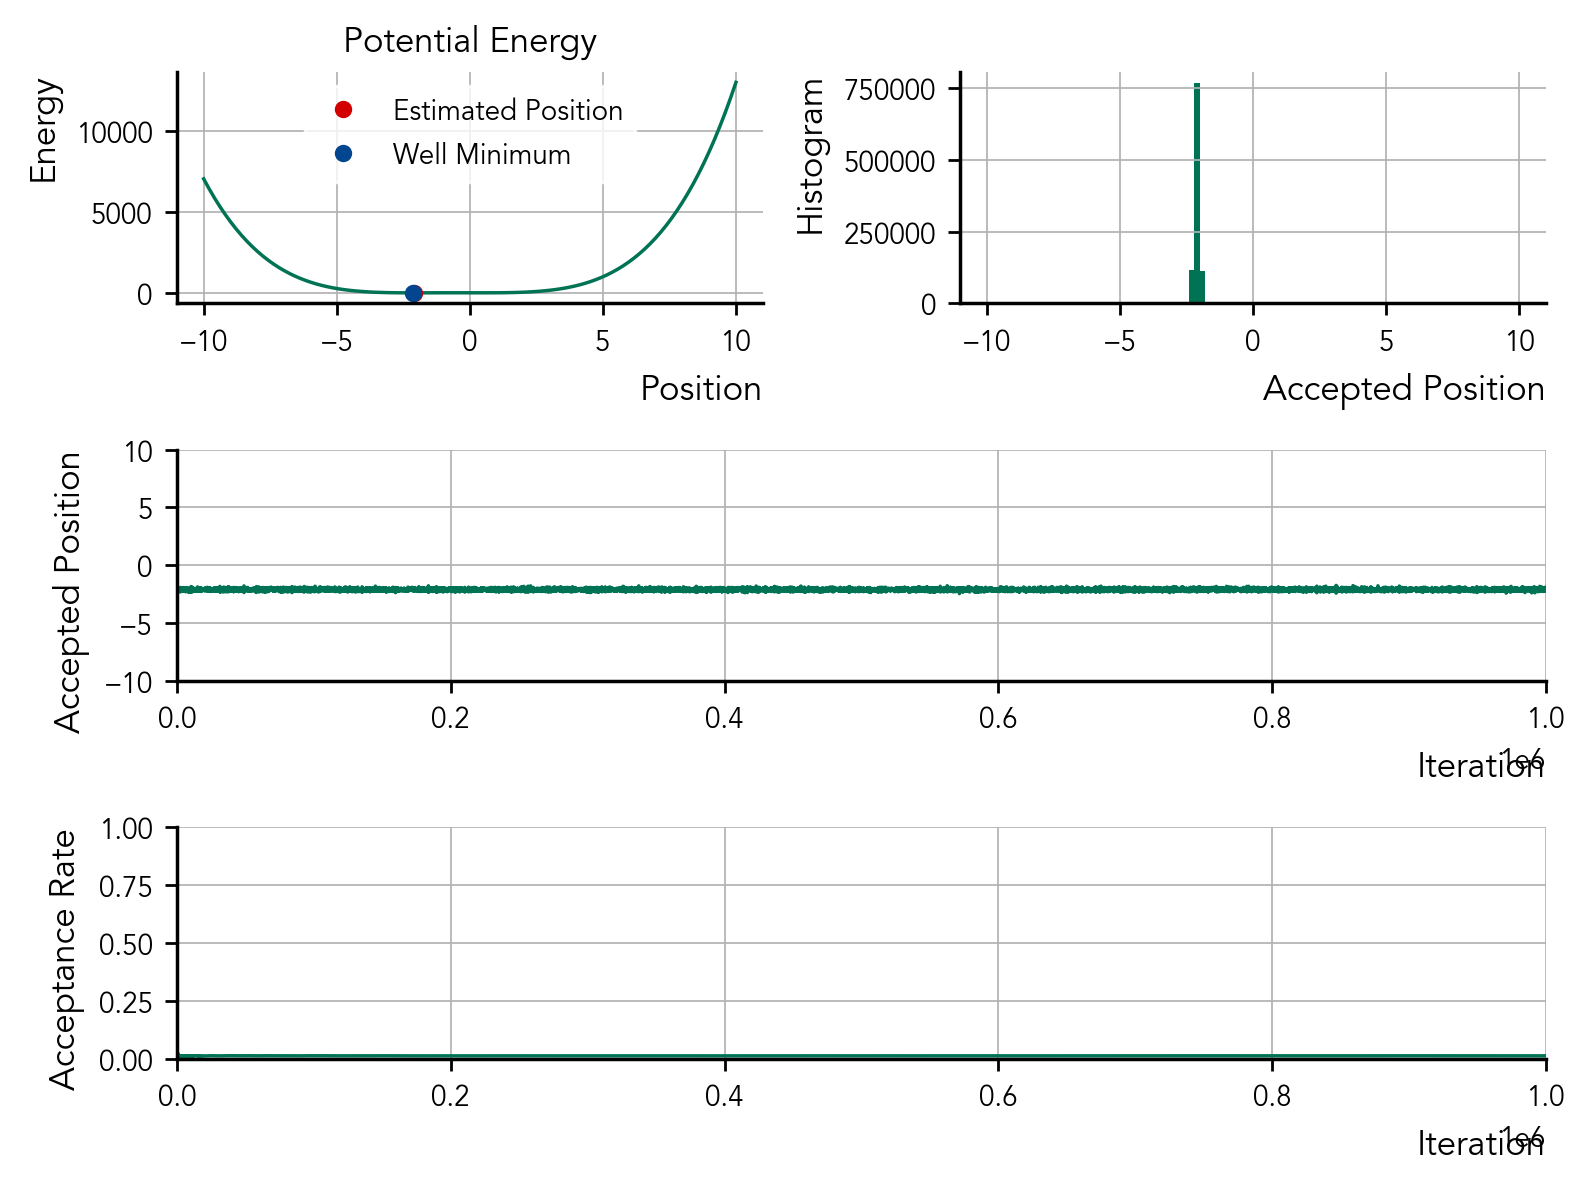

In [106]:
# for 
estimated_position, accepted_positions, acc_rate = monte_carlo_simulation(num_iterations, displacement_range, k_bT = 0.1)
print("Estimated Particle Position:", estimated_position)


# plotting
G = gridspec.GridSpec(3, 2)

ax = [plt.subplot(G[0, 0]), plt.subplot(G[1, :]), plt.subplot(G[0, 1]), plt.subplot(G[2, :])]

ax[0].set_title("Potential Energy")
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Position")
x = np.linspace(*displacement_range, 100)
ax[0].plot(x, potential_energy(x))
ax[0].plot(estimated_position, potential_energy(estimated_position), 'o', label="Estimated Position")
ax[0].plot(x[np.argmin(potential_energy(x))], np.min(potential_energy(x)), 'o', label="Well Minimum")
ax[0].legend()

ax[1].plot(accepted_positions)
ax[1].set_ylabel("Accepted Position")
ax[1].set_xlabel("Iteration")
ax[1].set_ylim(displacement_range)
ax[1].set_xlim(0, num_iterations)

# Plot a histogram of the accepted positions within the given range
ax[2].hist(accepted_positions, bins=100, range=displacement_range)
ax[2].set_xlabel("Accepted Position")
ax[2].set_ylabel("Histogram")

ax[3].plot(acc_rate)
ax[3].set_xlabel("Iteration")
ax[3].set_ylabel("Acceptance Rate")
ax[3].set_ylim(0, 1)
ax[3].set_xlim(0, num_iterations)

# tight layout
plt.tight_layout()

Text(0, 1, 's')

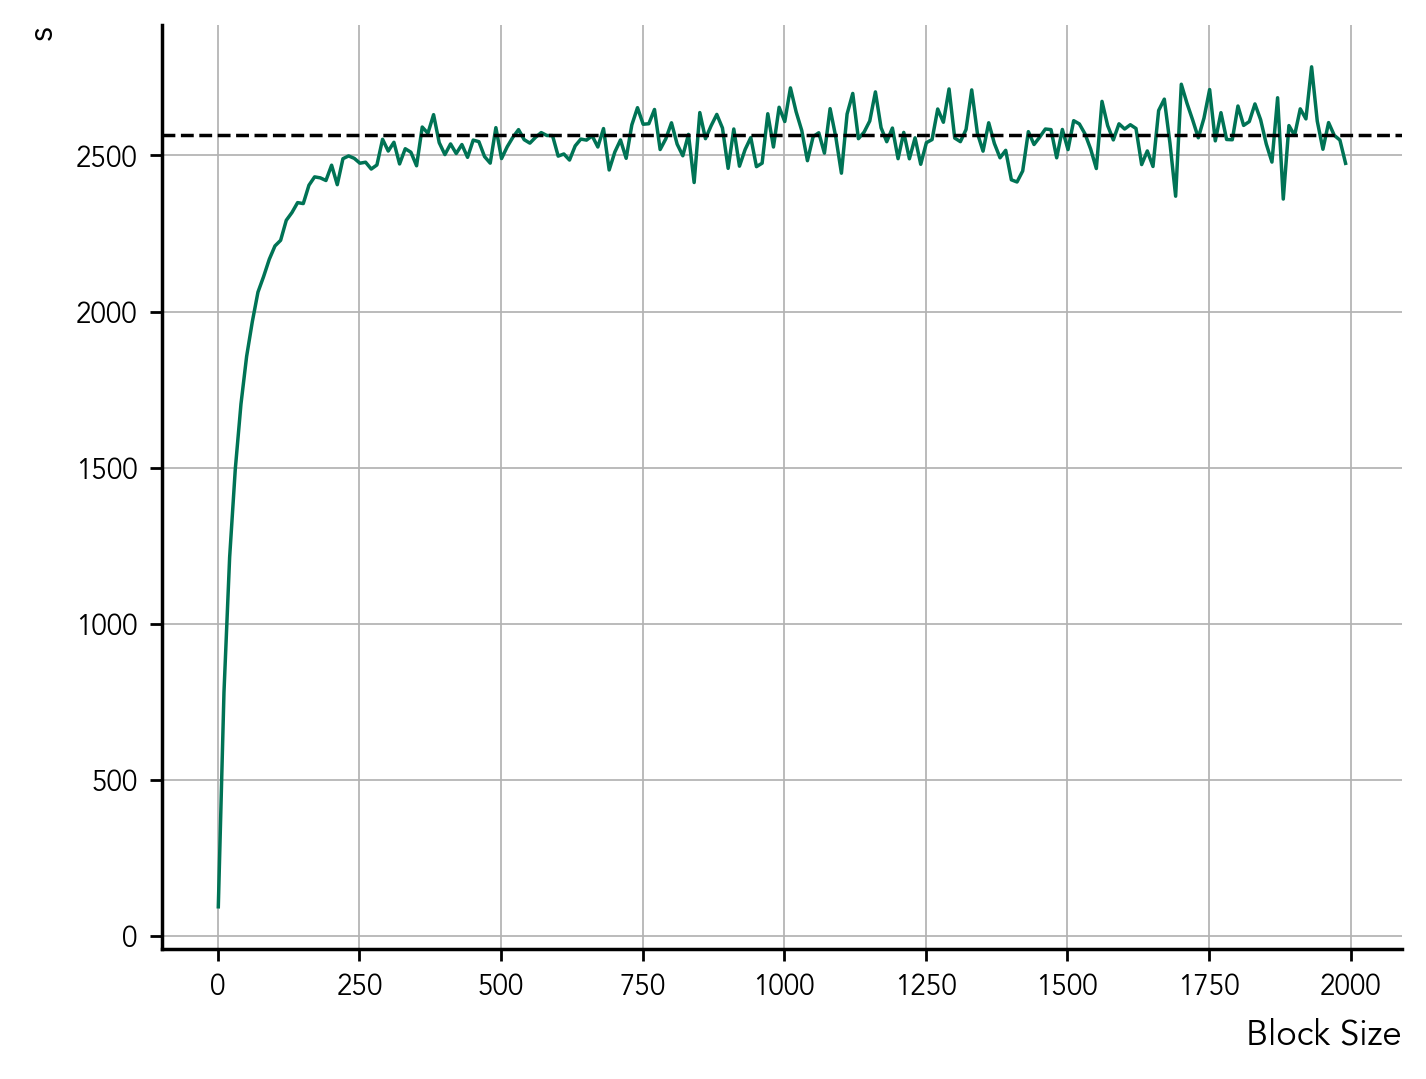

In [107]:
acc_pos_var_correlated = np.var(accepted_positions)

block_sizes = np.arange(1,2000,10)

# average samples 500 to 2000
get_plateau = block_sizes * block_variances/acc_pos_var_correlated
plateau_avg = np.mean(get_plateau[50:])
# Block averaging
block_variances = block_average(accepted_positions, block_sizes)

plt.plot(block_sizes, get_plateau, label="Block Averaging")

# Mark plateau value
plt.axhline(plateau_avg, color="0", ls = "--")

plt.xlabel("Block Size")
plt.ylabel("s")

In [108]:
block_size = block_sizes[np.abs(get_plateau - plateau_avg).argmin()]

print(f"Simulation temperature {0.1}")
print("-----------------------------")
print(f"Plateau value: \t\t {plateau_avg:.2f}")
print(f"Chosen block size: \t {block_size}")

acc_pos_std_corrected = np.sqrt(acc_pos_var_correlated /  len(accepted_positions) * block_size)

print(f"\nPosition is estimated to be {estimated_position:.5f} +/- {acc_pos_std_corrected:.5f}")

est_0_1 = estimated_position
est_0_1_err = acc_pos_std_corrected

Simulation temperature 0.1
-----------------------------
Plateau value: 		 2565.36
Chosen block size: 	 1971

Position is estimated to be -2.10220 +/- 0.00369


### $T = 0.5$

/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_14076/2898554055.py:24: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(-(new_energy - current_energy) / k_bT)


Estimated Particle Position: -2.0388787143627902


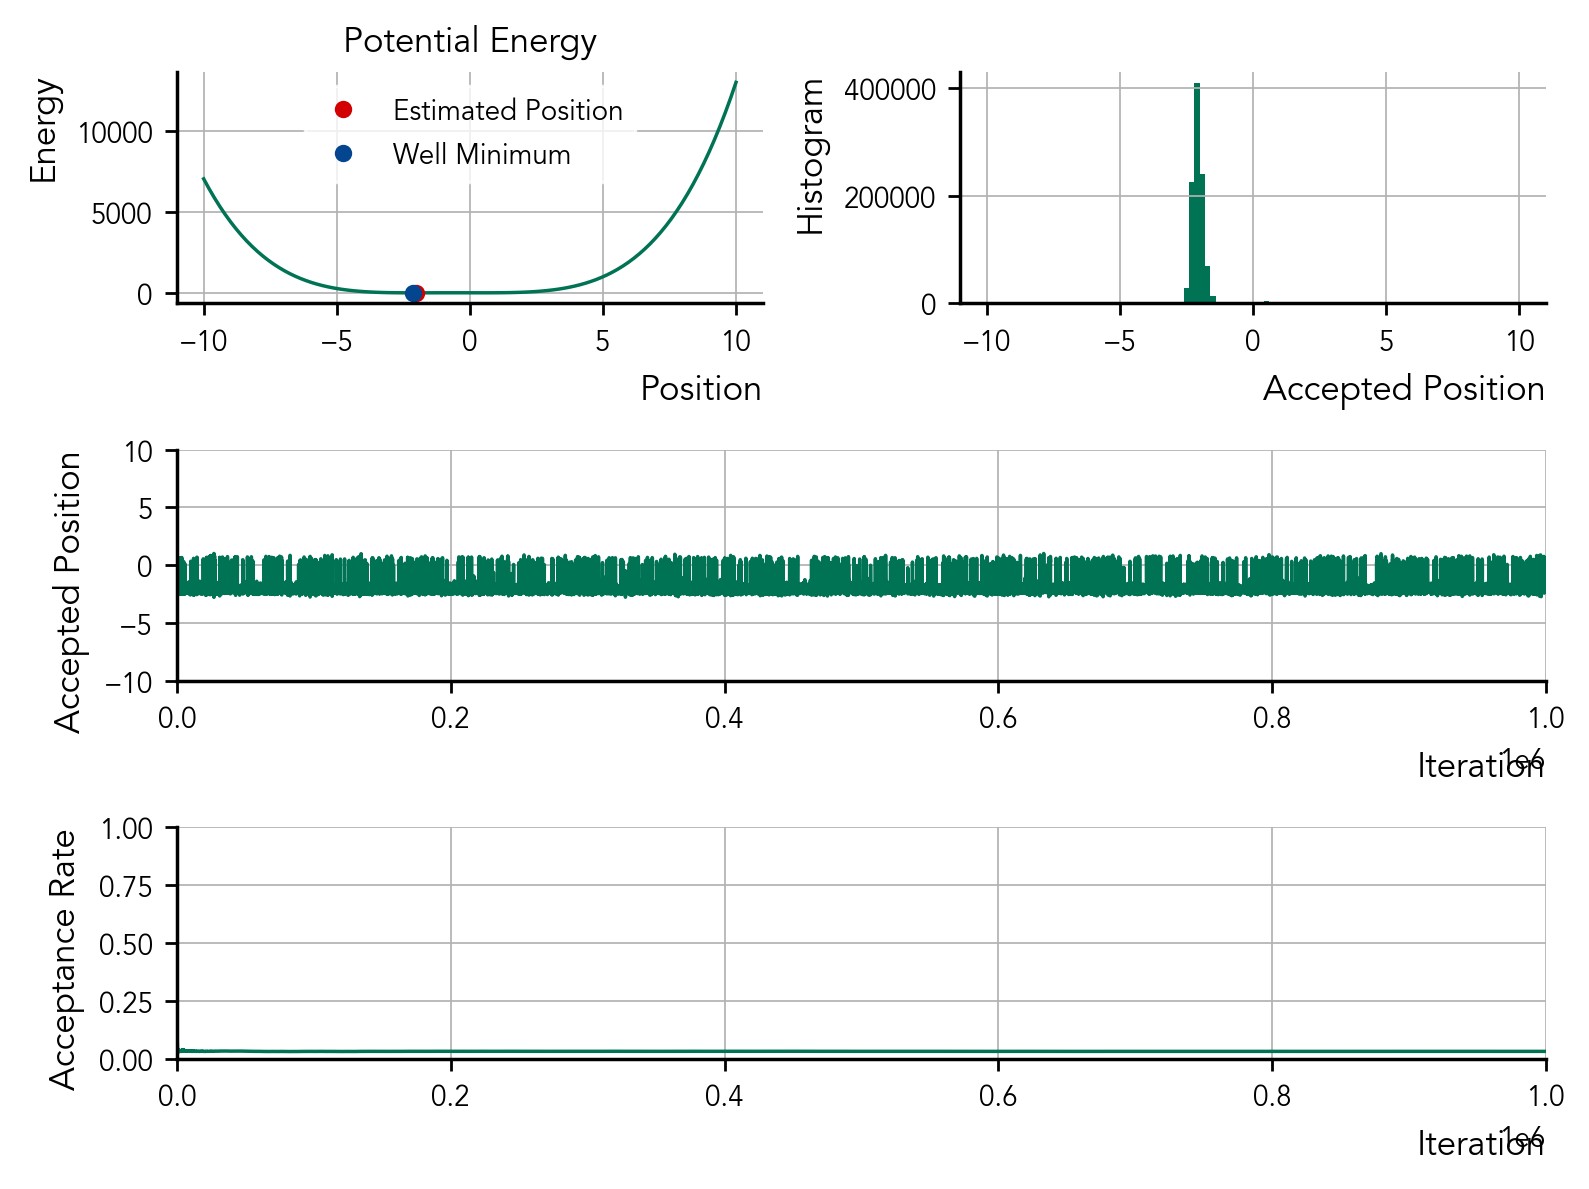

In [109]:
# for 
estimated_position, accepted_positions, acc_rate = monte_carlo_simulation(num_iterations, displacement_range, k_bT = 0.5)
print("Estimated Particle Position:", estimated_position)


# plotting
G = gridspec.GridSpec(3, 2)

ax = [plt.subplot(G[0, 0]), plt.subplot(G[1, :]), plt.subplot(G[0, 1]), plt.subplot(G[2, :])]

ax[0].set_title("Potential Energy")
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Position")
x = np.linspace(*displacement_range, 100)
ax[0].plot(x, potential_energy(x))
ax[0].plot(estimated_position, potential_energy(estimated_position), 'o', label="Estimated Position")
ax[0].plot(x[np.argmin(potential_energy(x))], np.min(potential_energy(x)), 'o', label="Well Minimum")
ax[0].legend()

ax[1].plot(accepted_positions)
ax[1].set_ylabel("Accepted Position")
ax[1].set_xlabel("Iteration")
ax[1].set_ylim(displacement_range)
ax[1].set_xlim(0, num_iterations)

# Plot a histogram of the accepted positions within the given range
ax[2].hist(accepted_positions, bins=100, range=displacement_range)
ax[2].set_xlabel("Accepted Position")
ax[2].set_ylabel("Histogram")

ax[3].plot(acc_rate)
ax[3].set_xlabel("Iteration")
ax[3].set_ylabel("Acceptance Rate")
ax[3].set_ylim(0, 1)
ax[3].set_xlim(0, num_iterations)

# tight layout
plt.tight_layout()

Text(0, 1, 's')

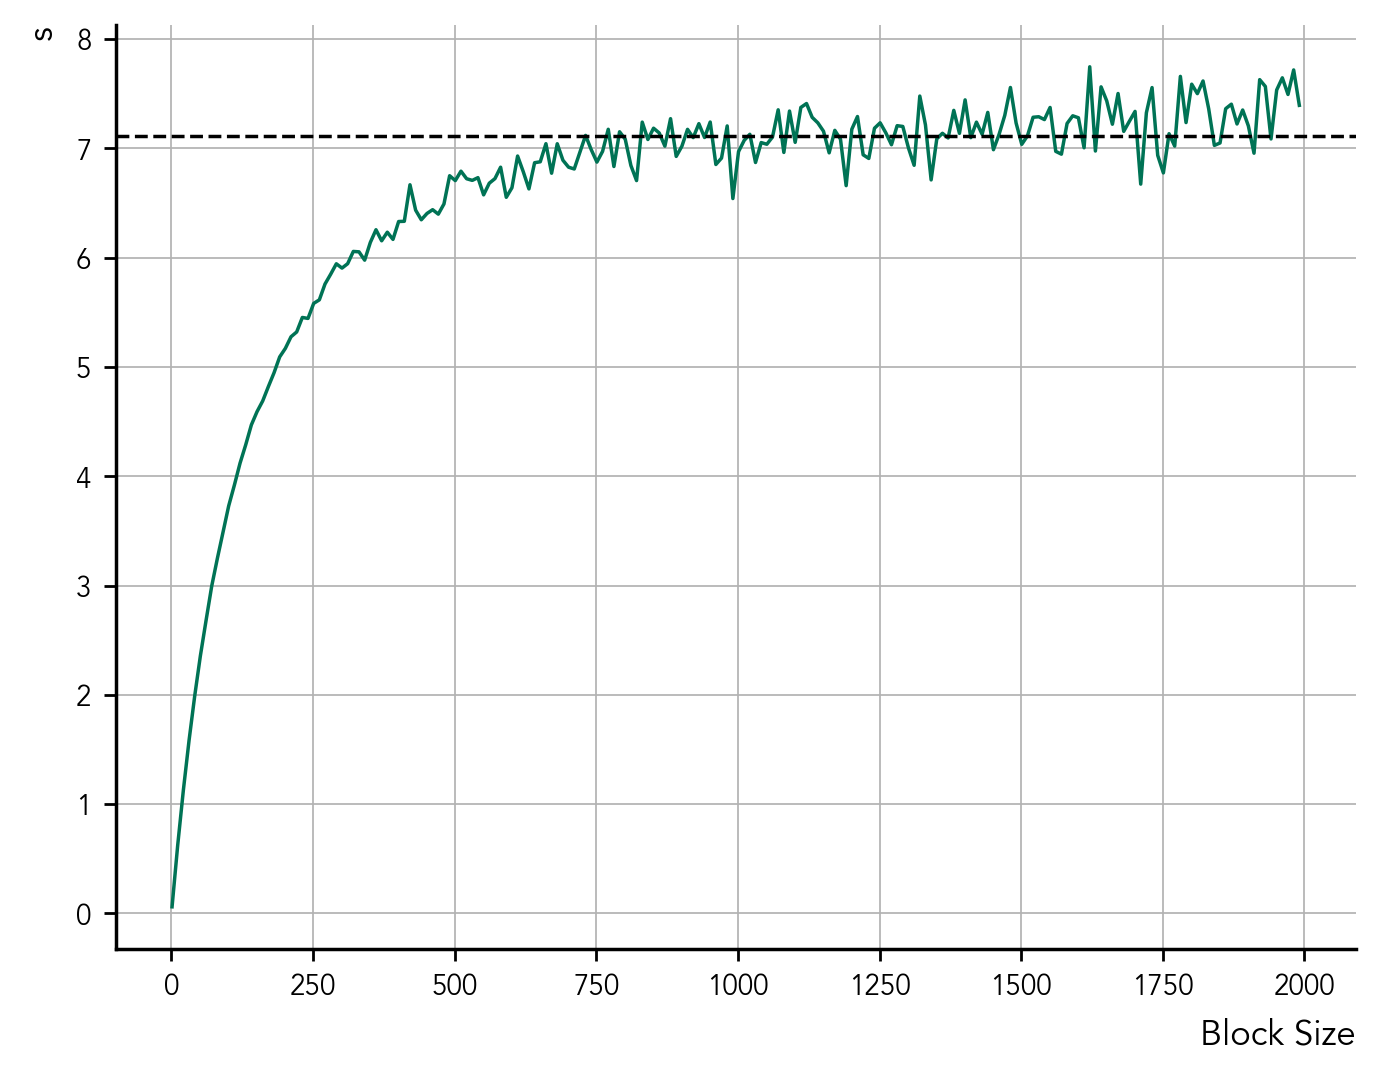

In [110]:
acc_pos_var_correlated = np.var(accepted_positions)

block_sizes = np.arange(1,2000,10)

# average samples 500 to 2000
get_plateau = block_sizes * block_variances/acc_pos_var_correlated
plateau_avg = np.mean(get_plateau[50:])
# Block averaging
block_variances = block_average(accepted_positions, block_sizes)

plt.plot(block_sizes, get_plateau, label="Block Averaging")

# Mark plateau value
plt.axhline(plateau_avg, color="0", ls = "--")

plt.xlabel("Block Size")
plt.ylabel("s")

In [111]:
block_size = block_sizes[np.abs(get_plateau - plateau_avg).argmin()]

print(f"Simulation temperature {0.5}")
print("-----------------------------")
print(f"Plateau value: \t\t {plateau_avg:.2f}")
print(f"Chosen block size: \t {block_size}")

acc_pos_std_corrected = np.sqrt(acc_pos_var_correlated /  len(accepted_positions) * block_size)

print(f"\nPosition is estimated to be {estimated_position:.5f} +/- {acc_pos_std_corrected:.5f}")

est_0_5 = estimated_position
est_0_5_err = acc_pos_std_corrected

Simulation temperature 0.5
-----------------------------
Plateau value: 		 7.12
Chosen block size: 	 731

Position is estimated to be -2.03888 +/- 0.00909


### $T = 2$

Estimated Particle Position: -1.3266712769850586


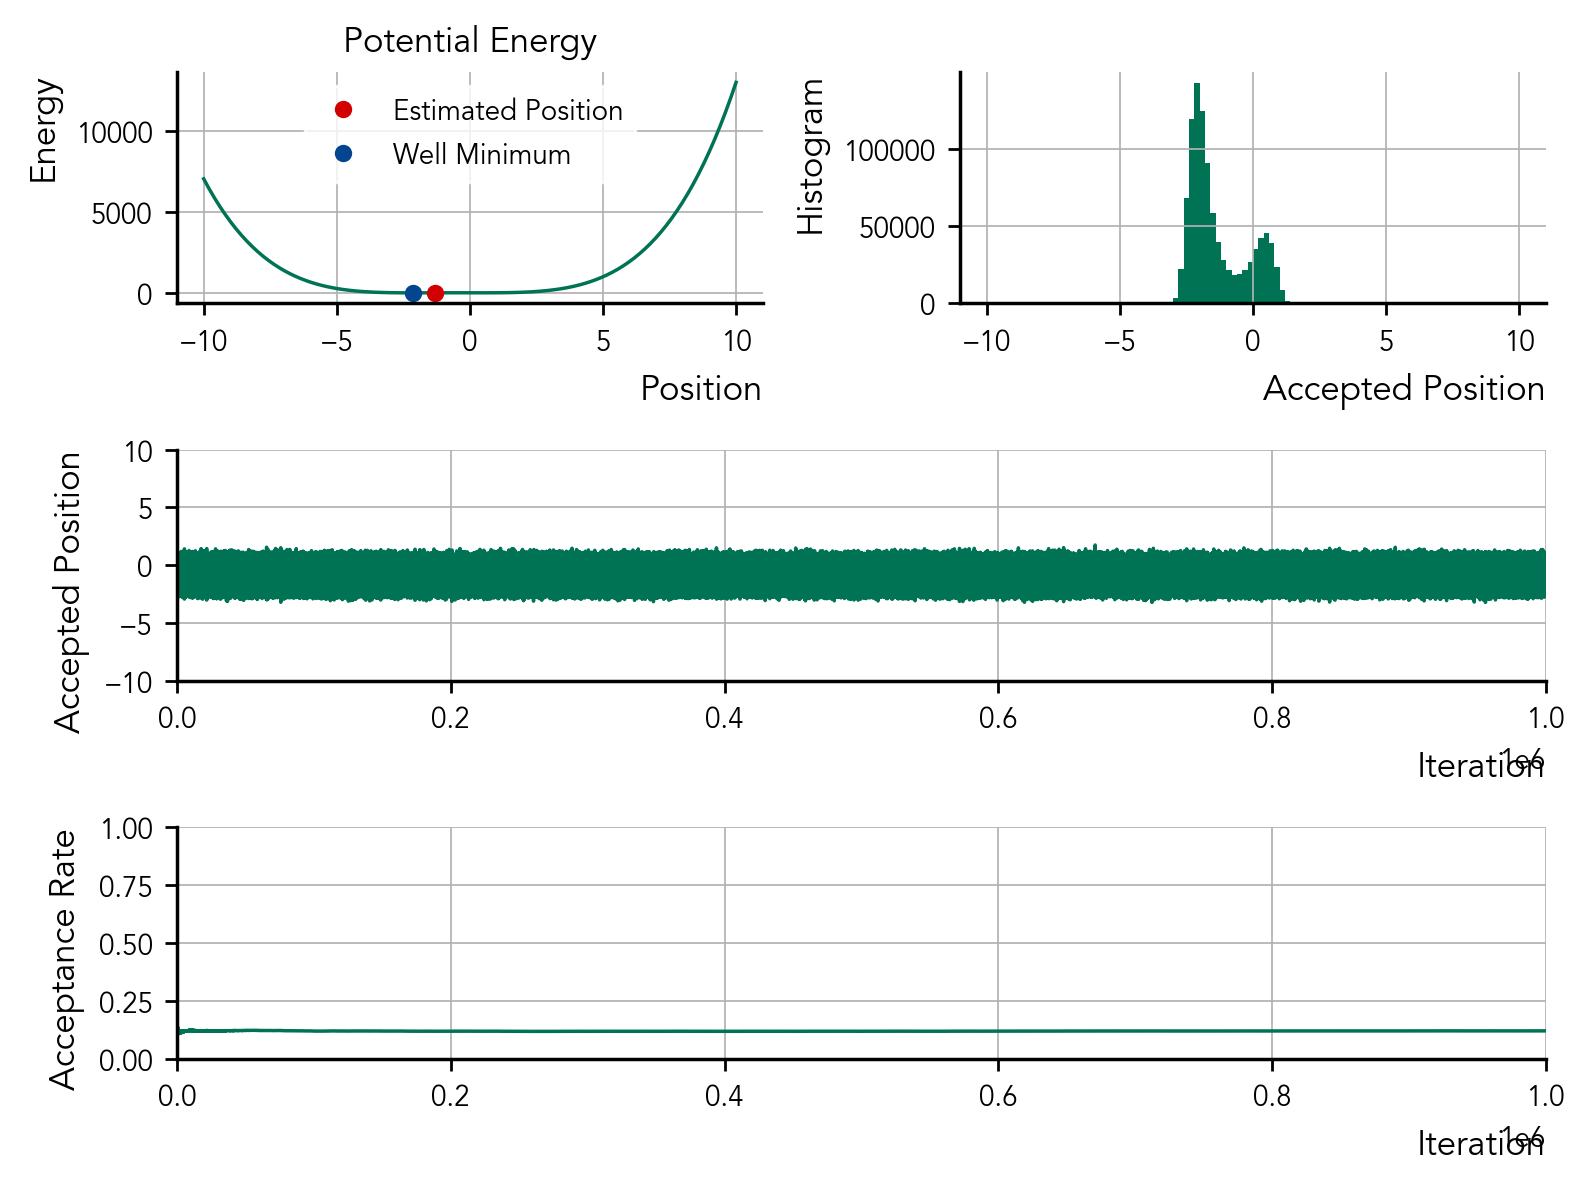

In [112]:
# for 
estimated_position, accepted_positions, acc_rate = monte_carlo_simulation(num_iterations, displacement_range, k_bT = 2)
print("Estimated Particle Position:", estimated_position)


# plotting
G = gridspec.GridSpec(3, 2)

ax = [plt.subplot(G[0, 0]), plt.subplot(G[1, :]), plt.subplot(G[0, 1]), plt.subplot(G[2, :])]

ax[0].set_title("Potential Energy")
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Position")
x = np.linspace(*displacement_range, 100)
ax[0].plot(x, potential_energy(x))
ax[0].plot(estimated_position, potential_energy(estimated_position), 'o', label="Estimated Position")
ax[0].plot(x[np.argmin(potential_energy(x))], np.min(potential_energy(x)), 'o', label="Well Minimum")
ax[0].legend()

ax[1].plot(accepted_positions)
ax[1].set_ylabel("Accepted Position")
ax[1].set_xlabel("Iteration")
ax[1].set_ylim(displacement_range)
ax[1].set_xlim(0, num_iterations)

# Plot a histogram of the accepted positions within the given range
ax[2].hist(accepted_positions, bins=100, range=displacement_range)
ax[2].set_xlabel("Accepted Position")
ax[2].set_ylabel("Histogram")

ax[3].plot(acc_rate)
ax[3].set_xlabel("Iteration")
ax[3].set_ylabel("Acceptance Rate")
ax[3].set_ylim(0, 1)
ax[3].set_xlim(0, num_iterations)

# tight layout
plt.tight_layout()

Text(0, 1, 's')

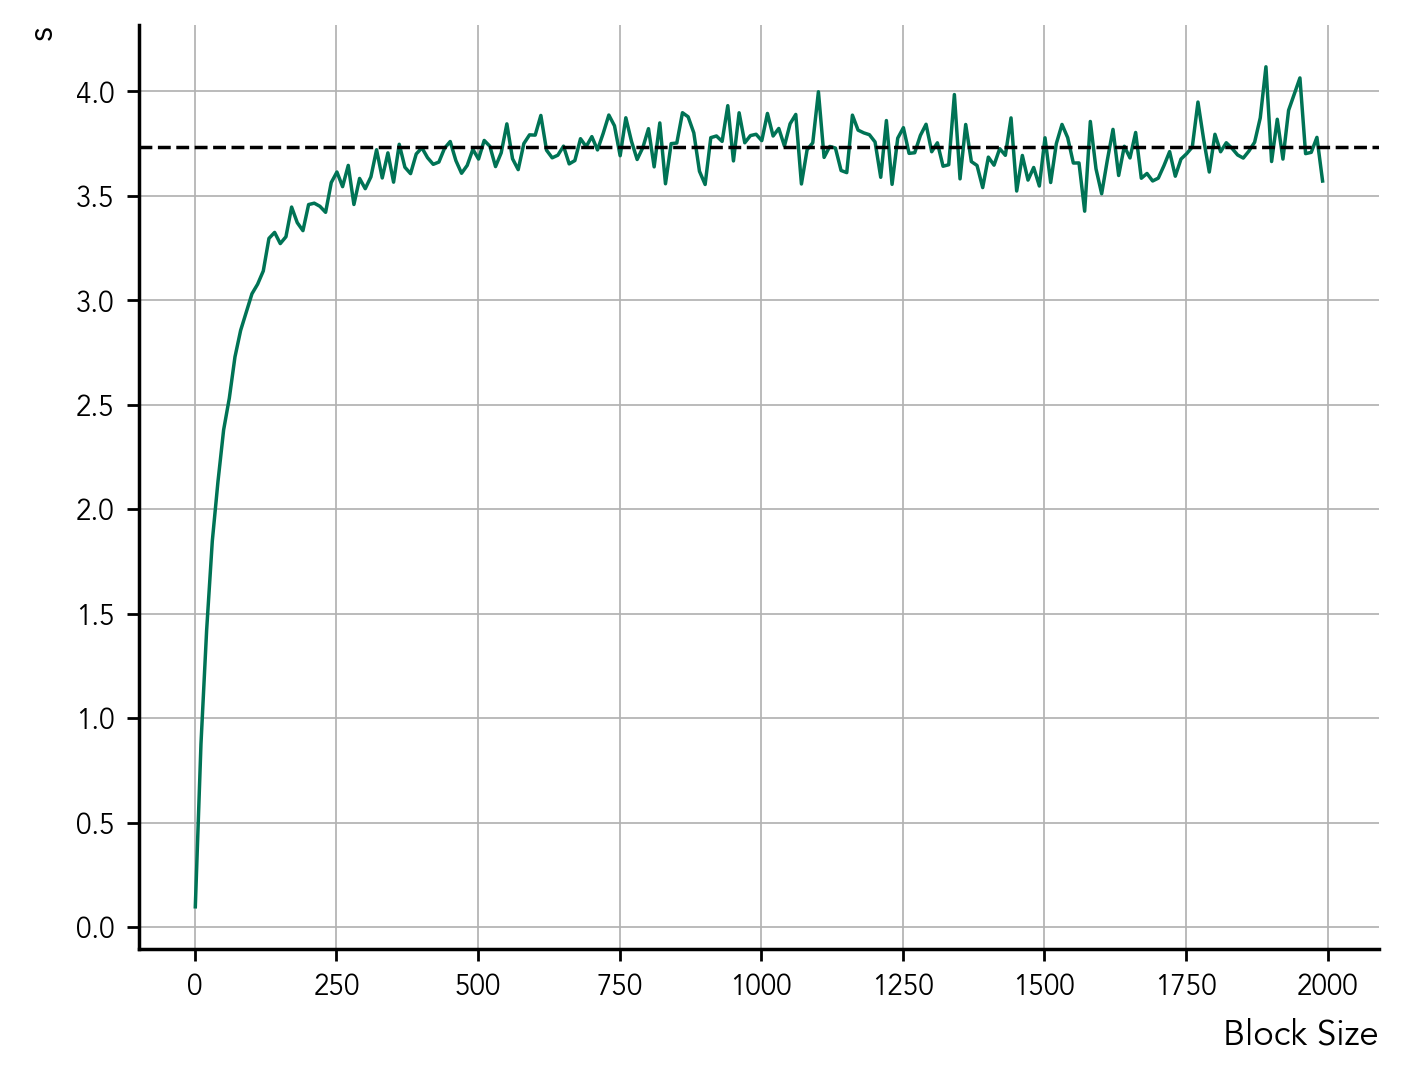

In [113]:
acc_pos_var_correlated = np.var(accepted_positions)

block_sizes = np.arange(1,2000,10)

# average samples 500 to 2000
get_plateau = block_sizes * block_variances/acc_pos_var_correlated
plateau_avg = np.mean(get_plateau[50:])
# Block averaging
block_variances = block_average(accepted_positions, block_sizes)

plt.plot(block_sizes, get_plateau, label="Block Averaging")

# Mark plateau value
plt.axhline(plateau_avg, color="0", ls = "--")

plt.xlabel("Block Size")
plt.ylabel("s")

In [114]:
block_size = block_sizes[np.abs(get_plateau - plateau_avg).argmin()]

print(f"Simulation temperature {2}")
print("-----------------------------")
print(f"Plateau value: \t\t {plateau_avg:.2f}")
print(f"Chosen block size: \t {block_size}")

acc_pos_std_corrected = np.sqrt(acc_pos_var_correlated /  len(accepted_positions) * block_size)

print(f"\nPosition is estimated to be {estimated_position:.5f} +/- {acc_pos_std_corrected:.5f}")

est_2 = estimated_position
est_2_err = acc_pos_std_corrected

Simulation temperature 2
-----------------------------
Plateau value: 		 3.74
Chosen block size: 	 691

Position is estimated to be -1.32667 +/- 0.02830


In [115]:
# print table with results
print("Temperature \t\t Estimated Position \t\t Error")
print("---------------------------------------------------------------")
print(f"1 \t\t\t {est_1:.5f} \t\t\t {est_1_err:.5f}")
print(f"0.1 \t\t\t {est_0_1:.5f} \t\t\t {est_0_1_err:.5f}")
print(f"0.5 \t\t\t {est_0_5:.5f} \t\t\t {est_0_5_err:.5f}")
print(f"2 \t\t\t {est_2:.5f} \t\t\t {est_2_err:.5f}")


Temperature 		 Estimated Position 		 Error
------------------------------------------------------------
1 			 -1.74622 			 0.02459
0.1 			 -2.10220 			 0.00369
0.5 			 -2.03888 			 0.00909
2 			 -1.32667 			 0.02830


# Uncoupled spins

Considering system of $N$ independent spins $s_i \in \lbrace -1, 1\rbrace$ coupled to external magnetic field $H$ with the energy state $\nu = \lbrace s_1, s_2, \dots, s_N \rbrace$.
$$
E_\nu = - \sum_{i=1}^N s_i H
$$
With canonical partition function
$$
Z = 2^N \cosh^N (\beta H)
$$
and the mean magnetization with all the intermediate steps
$$
m = \frac{1}{N} \sum_{i = 1}^N s_i = - \frac{1}{N} \frac{\partial \ln Z}{\partial H} = \frac{1}{N} \frac{\partial \ln \cosh^N (\beta H)}{\partial H} = - \frac{1}{N} \frac{N \partial \ln \cosh (\beta H)}{\partial H} 
$$
$$
= \frac{\beta}{N} \frac{N \sinh (\beta H)}{\cosh (\beta H)} = \beta \tanh (\beta H)
$$
